In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# box filter 

kernel = np.ones((3,3))
image = cv2.imread('images/pattern.tif', cv2.IMREAD_GRAYSCALE)

plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title("image")

In [ ]:
m, n = kernel.shape
p_m, p_n = (m - 1) // 2, (n - 1) // 2

padded_image = np.pad(image, ((p_m, p_m), (p_n, p_n)), mode='constant', constant_values=0)


output_image1 = np.zeros_like(image, dtype=np.float32)


rows = image.shape[0]
cols = image.shape[1]

for row in range(rows):
    for col in range(cols):
        loc_region = padded_image[row: row + m, col: col + n]
        product = kernel * loc_region
        average = np.sum(product) / (m * n)
        output_image1[row, col] = average

plt.figure(figsize=(10,5))
plt.subplot(1,2,1); plt.imshow(image, cmap='gray'); plt.axis('off'); plt.title('original')
plt.subplot(1,2,2); plt.imshow(output_image1, cmap='gray'); plt.axis('off'); plt.title('smoothed')
plt.show()





In [ ]:
# 11 x 11 box filter 
kernel = np.ones((11,11))

m, n = kernel.shape
p_m, p_n = (m - 1) // 2, (n - 1) // 2

output_image2 = np.zeros_like(image, dtype=np.float32)
padded_image = np.pad(image, ((p_m, p_m), (p_n, p_n)), mode='constant', constant_values=0)

rows, cols = image.shape

for row in range(rows):
    for col in range(cols):
        reg = padded_image[row:row + m, col:col+n]
        prod = reg * kernel
        aver = np.sum(prod) / (m * n)
        output_image2[row, col] = aver


plt.figure(figsize=(10,5))
plt.subplot(1,3,1); plt.imshow(image, cmap='gray')
plt.axis('off')
plt.title('original')

plt.subplot(1,3,2)
plt.imshow(output_image1, cmap='gray')
plt.axis('off'); plt.title('3 x 3')

plt.subplot(1,3,3)
plt.imshow(output_image2, cmap='gray')
plt.title("11 x 11")
plt.axis("off")

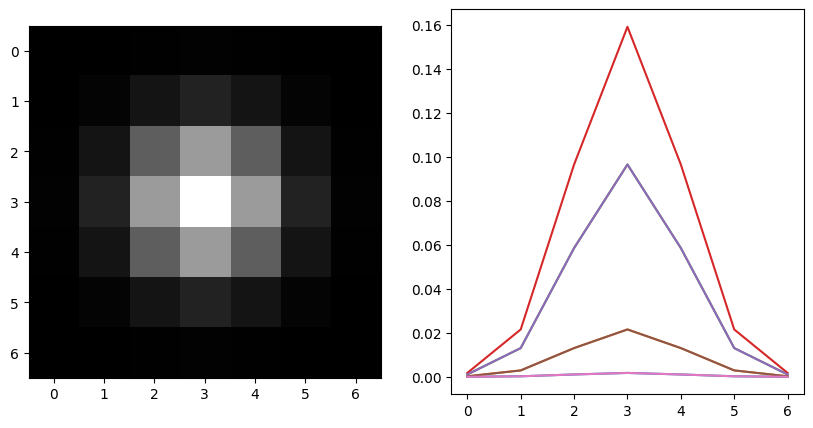

In [ ]:
# gussian filter 
def gussian_filter(sigma, k = 1):
    size = int(np.ceil(6 * sigma))

    if not size % 2 :
        size += 1

    kernel = np.zeros((size, size))

    center = size // 2

    for x in range(size):
        for y in range(size):
            kernel[x,y] = k * np.exp(-(np.square(x - center) + np.square(y - center))/(2 * np.square(sigma)))

    kernel = kernel / np.sum(kernel)
    return kernel

sigma = 1
kernel = gussian_filter(sigma)

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(kernel, cmap='gray')

plt.subplot(1,2,2)
plt.plot(kernel)

Text(0.5, 1.0, 'kernel')

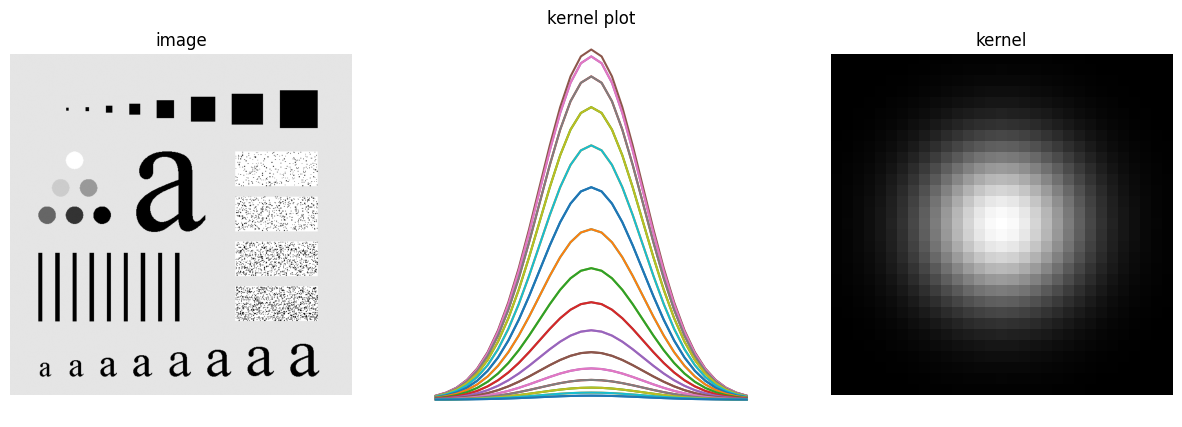

In [25]:
# now the gussian kernel use on image

img = cv2.imread("images/pattern.tif", cv2.IMREAD_GRAYSCALE)
sigma = 5 
kernel = gussian_filter(sigma)

fig, axe = plt.subplots(1,3, figsize=(15,5))

axe[0].imshow(img, cmap='gray')
axe[0].axis('off')
axe[0].set_title("image")

axe[1].plot(kernel)
axe[1].axis("off")
axe[1].set_title("kernel plot")

axe[2].imshow(kernel, cmap='gray')
axe[2].axis("off")
axe[2].set_title("kernel")

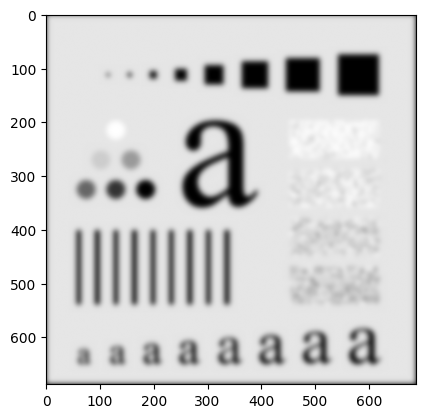

In [ ]:
m,n = kernel.shape

p_m , p_n = (m - 1) // 2, (n - 1) // 2

padded_image = np.pad(img, ((p_m, p_m), (p_n, p_n)), mode='constant', constant_values=0)

out_img = np.zeros_like(img)
rows = out_img.shape[0]
cols = out_img.shape[1]

for row in range(rows):
    for col in range(cols):
        reg = padded_image[row: row + m, col: col + n]
        prod = kernel * reg
        ave = np.sum(prod)
        out_img[row, col] = ave

plt.imshow(out_img, cmap='gray')

(688, 688)

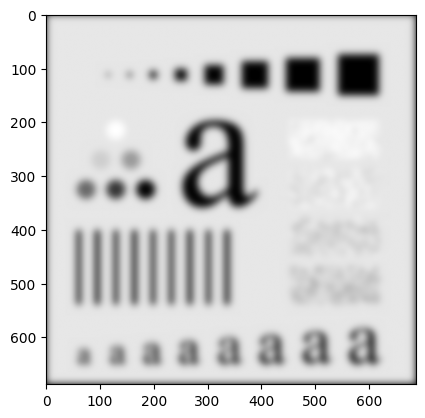

In [ ]:
# gussian kernel with sigma 7
sigma = 7
kernel = gussian_filter(sigma)
m,n = kernel.shape
p_m, p_n = (m - 1) // 2, (n - 1) // 2

padded_image1 = np.pad(img, ((p_m,p_m), (p_n,p_n)), mode='constant', constant_values=0)

out_img1 = np.zeros_like(img)

rows = img.shape[0]
cols = img.shape[1]

for row in range(rows):
    for col in range(cols):
        reg = padded_image1[row: row + m, col: col + m]
        prod = (reg * kernel) 
        sum = np.sum(prod)
        out_img1[row, col] = sum

plt.imshow(out_img1, cmap='gray')

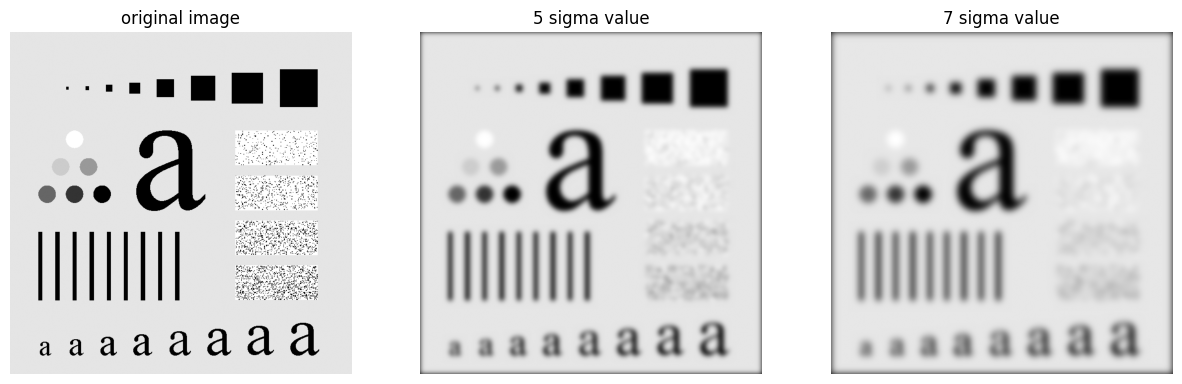

In [36]:
# display all picture
fig , axe = plt.subplots(1,3, figsize=(15,5))

axe[0].imshow(img, cmap='gray')
axe[0].set_title('original image')

axe[1].imshow(out_img, cmap='gray')
axe[1].set_title('5 sigma value')

axe[2].imshow(out_img1, cmap='gray')
axe[2].set_title('7 sigma value')

for i in range(3):
    axe[i].axis('off')